In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.animation as animation 
#from mpl_toolkits.basemap import Basemap

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
Deep_Solar_df = pd.read_csv('deepsolar_tract.csv',  encoding='latin1')


In [7]:
#Load Deep Solar Census State Gini and State GDP CSVs 
Deep_Solar_df = pd.read_csv('deepsolar_tract.csv', encoding='latin1')

#census = pd.read_csv("nst-est2018-01.csv")

#state_gini=pd.read_csv('State Gini Index .csv')

#state_gdp=pd.read_csv('bea-gdp-by-state.csv')


In [8]:
#group data by county and take means and sums of respective points 
Solar_county_means = Deep_Solar_df.groupby('county').mean()[['lat','daily_solar_radiation','avg_electricity_retail_rate',
                                                             'average_household_income','education_high_school_graduate',
                                                             'gini_index','per_capita_income','incentive_count_nonresidential',
                                                             'incentive_count_residential','voting_2016_gop_percentage',
                                                             'rebate','population_density']]

Solar_county_sums = Deep_Solar_df.groupby('county').sum()[['total_panel_area_residential','total_panel_area',
                                                          'solar_system_count','solar_system_count_residential',
                                                           'solar_system_count_nonresidential', 'total_panel_area_nonresidential',
                                                           'population','land_area']]


#merge means and sums 
Deep_Solar_county = pd.merge(Solar_county_means,Solar_county_sums, left_index=True, right_index=True)


#generate new data points for counties based on summated data 
Deep_Solar_county['county_solar_system_count_per_capita'] = (Deep_Solar_county['solar_system_count']/Deep_Solar_county['population'])                  
Deep_Solar_county['county_solar_system_count_residential_per_capita'] = (Deep_Solar_county['solar_system_count_residential']/Deep_Solar_county['population'])                  
Deep_Solar_county['county_solar_system_count_nonresidential_per_capita'] = (Deep_Solar_county['solar_system_count_nonresidential']/Deep_Solar_county['population'])                  
Deep_Solar_county['county_solar_panel_area_per_capita'] = (Deep_Solar_county['total_panel_area']/Deep_Solar_county['population'])
Deep_Solar_county['county_residential_solar_panel_area_per_capita'] = (Deep_Solar_county['total_panel_area_residential']/Deep_Solar_county['population'])
Deep_Solar_county['county_nonresidential_solar_panel_area_per_capita'] = (Deep_Solar_county['total_panel_area_nonresidential']/Deep_Solar_county['population'])
Deep_Solar_county['county_nonresidential_solar_panel_area_mean'] = (Deep_Solar_county['total_panel_area_nonresidential']/Deep_Solar_county['solar_system_count_residential'])
Deep_Solar_county['county_residential_solar_panel_area_mean'] = (Deep_Solar_county['total_panel_area_residential']/Deep_Solar_county['solar_system_count_nonresidential'])


<function matplotlib.pyplot.show(*args, **kw)>

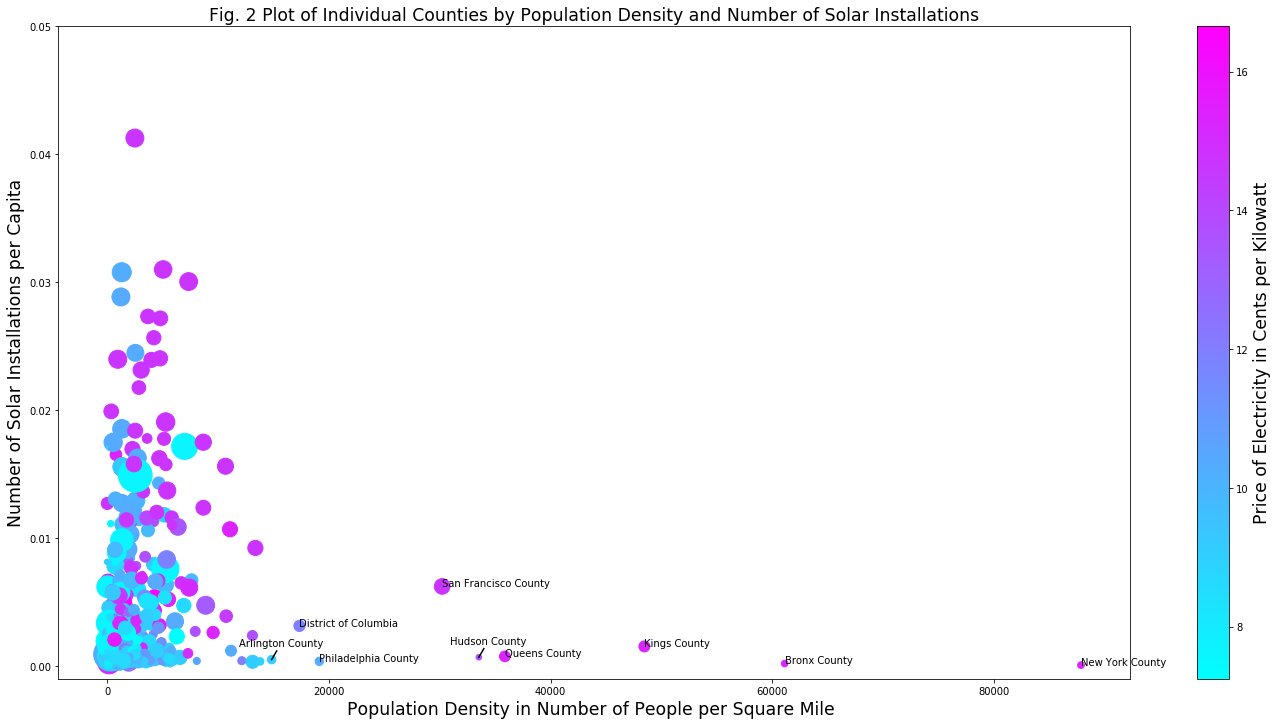

In [9]:
#Create first plot
#set figure size 
plt.figure(figsize=(24,12))

#set x and y coordinates
x1=Deep_Solar_county['population_density']
y1=Deep_Solar_county['county_solar_system_count_residential_per_capita']

#set Scaler 
s1=Deep_Solar_county['county_residential_solar_panel_area_mean']

#set color map
cmap = plt.cm.cool
norm = matplotlib.colors.Normalize(vmin=7.250000, vmax=16.650000)
c2 = cmap(norm(Deep_Solar_county.avg_electricity_retail_rate.values))

#create plot 
plt.scatter(x=x1,y=y1,s=s1,color=c2, alpha=1,label='Inline label')
plt.ylim(-.001,0.05)

#lable plot 
plt.xlabel('Population Density in Number of People per Square Mile ',fontsize='xx-large')
plt.ylabel('Number of Solar Installations per Capita',fontsize='xx-large')
plt.title('Fig. 2 Plot of Individual Counties by Population Density and Number of Solar Installations',fontsize='xx-large')

for  ind in Deep_Solar_county.index:
    i=Deep_Solar_county['population_density'][ind]
    j=Deep_Solar_county['county_solar_system_count_residential_per_capita'][ind]
    txt = Deep_Solar_county.index
    if i > 14000:  
            overlapcounty=('Hudson County','Alexandria city',
                          'Cook County','Arlington County')
            if ind in overlapcounty: 
                plt.text(i, j, s=ind,withdash=True, 
                    dashdirection=1,
                    dashlength=10,
                    rotation=0,
                    dashrotation=60,
                    dashpush=0)
            else:  
                plt.annotate(ind,(i,j))
            
    else:
        None
    
#create and label color bar 
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm).set_label('Price of Electricity in Cents per Kilowatt', rotation=90,fontsize = 'xx-large')

plt.show 

<function matplotlib.pyplot.show(*args, **kw)>

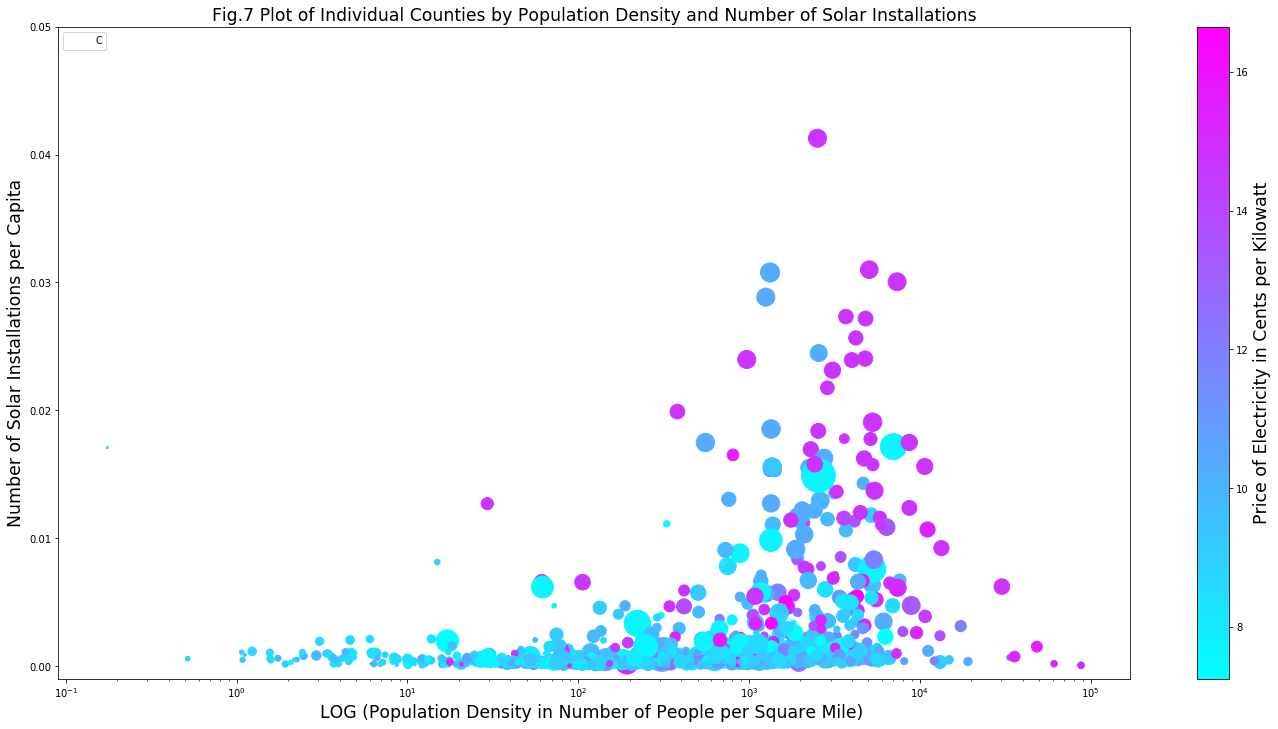

In [10]:
#Create second plot
#set figure size 
plt.figure(figsize=(24,12))

#set x and y coordinates
x2=Deep_Solar_county['population_density']
y2=Deep_Solar_county['county_solar_system_count_residential_per_capita']

#set scaler 
s2=Deep_Solar_county['county_residential_solar_panel_area_mean']

cmap = plt.cm.cool
#cmap = plt.cm.rainbow 
norm = matplotlib.colors.Normalize(vmin=7.250000, vmax=16.650000)
c2 = cmap(norm(Deep_Solar_county.avg_electricity_retail_rate.values))

plt.scatter(x=x2,y=y2,s=s2,color=c2, alpha=1,label='Inline label')

plt.xlabel('LOG (Population Density in Number of People per Square Mile) ',fontsize='xx-large')
plt.ylabel('Number of Solar Installations per Capita',fontsize='xx-large')
plt.title('Fig.7 Plot of Individual Counties by Population Density and Number of Solar Installations',fontsize='xx-large')
plt.xscale('log')
#plt.set_label('# of contacts', rotation=270)

plt.ylim(-.001,0.05)
#plt.colorbar(sm).set_yticklabels(['0','1','2','>3'])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm).set_label('Price of Electricity in Cents per Kilowatt', rotation=90,fontsize = 'xx-large')

plt.legend('County_scaled to average residential installation size',         
           loc=2,
           markerscale = 0.25,
           frameon = True, 
           labelspacing = 1)
           #fontsize = 'xx-large')
plt.show 



<function matplotlib.pyplot.show(*args, **kw)>

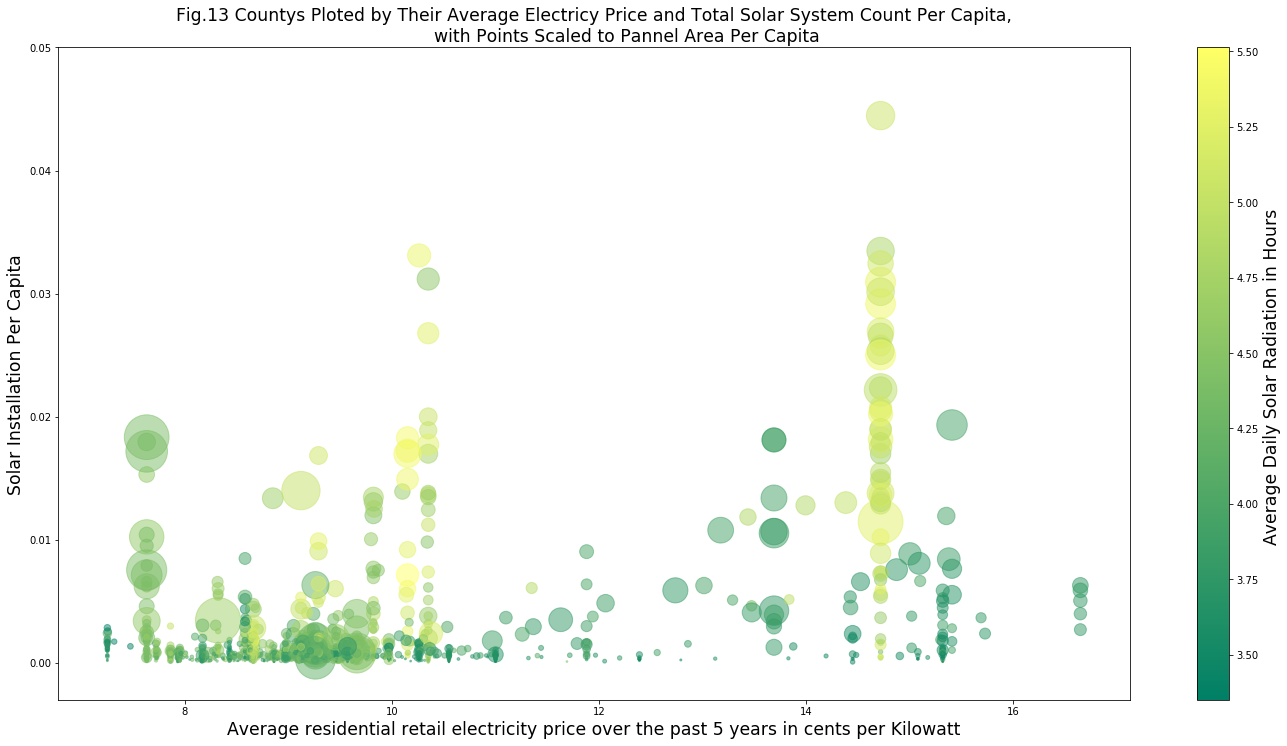

In [11]:
#generate Scatter plot of electricity prices and solar installations
#set plot size
plt.figure(figsize=(24,12))

# set coordinates for plot
x3=Deep_Solar_county['avg_electricity_retail_rate']
y3=Deep_Solar_county['county_solar_system_count_per_capita']


s3=Deep_Solar_county['county_solar_panel_area_per_capita']*500


#generate color map
cmap = plt.cm.summer 
norm = matplotlib.colors.Normalize(vmin= 3.350000, vmax=5.513125)
c1 = cmap(norm(Deep_Solar_county.daily_solar_radiation.values))

#Plot Points 
plt.scatter(x=x3,y=y3,s=s3,color= c1 , alpha=.5,label='Inline label')
plt.ylim(-0.003,0.05)

# Label Axis 
plt.xlabel('Average residential retail electricity price over the past 5 years in cents per Kilowatt',fontsize='xx-large')
plt.ylabel('Solar Installation Per Capita',fontsize='xx-large')
plt.title('''Fig.13 Countys Ploted by Their Average Electricy Price and Total Solar System Count Per Capita,
            with Points Scaled to Pannel Area Per Capita''',fontsize='xx-large')

#create and label color bar 
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm).set_label('Average Daily Solar Radiation in Hours ', rotation=90,fontsize = 'xx-large')

plt.show 


In [12]:
Deep_Solar_df.daily_solar_radiation.describe()

count    66735.000000
mean         4.254363
std          0.554358
min          3.300000
25%          3.790000
50%          4.110000
75%          4.610000
max          5.680000
Name: daily_solar_radiation, dtype: float64

(array([56810.,   218.,     0.,     0.,     0.,  5213.,     0.,  8056.,
         1406.,   834.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 10 Patch objects>)

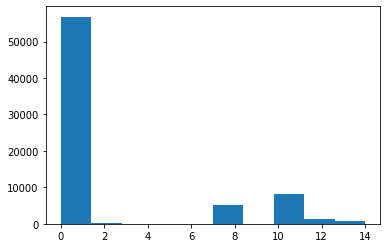

In [13]:
plt.hist(Deep_Solar_df.rebate)

Choose one variable and plot that variable four different ways.

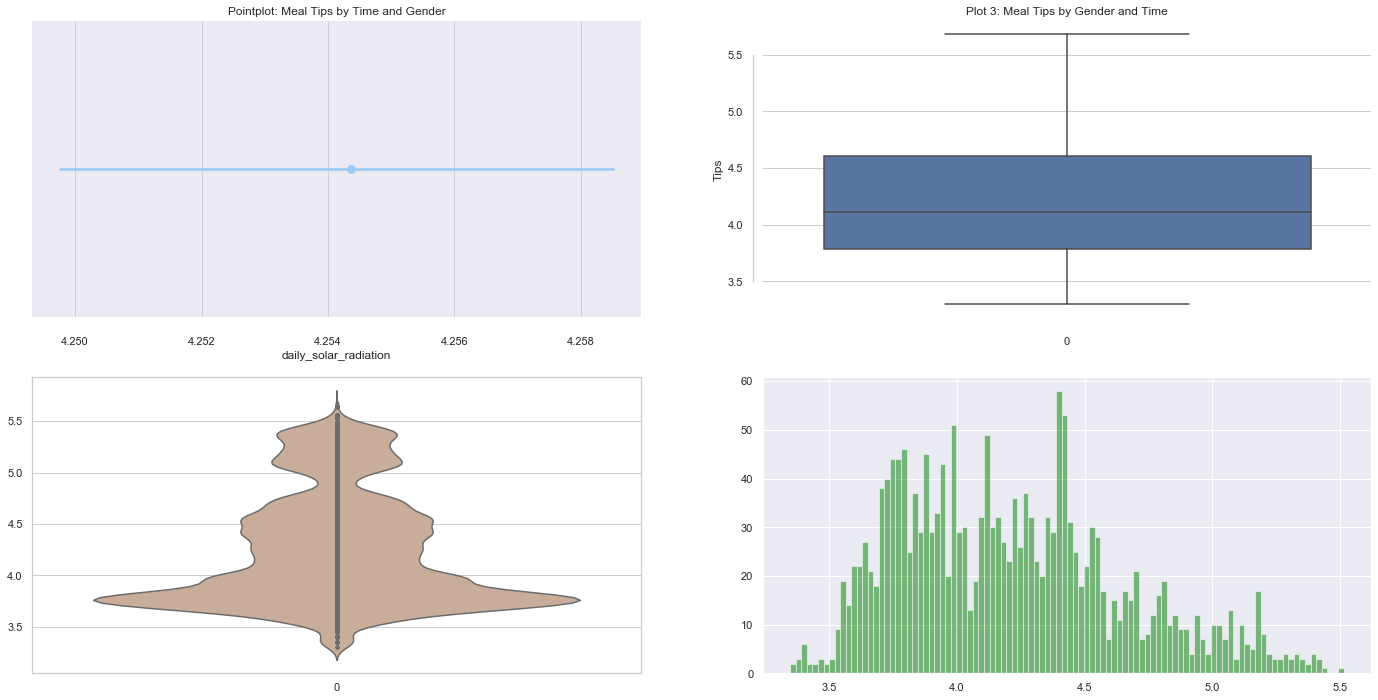

In [26]:
#Create 4 subplots 
plt.figure(figsize=(24,12))
#subplot 1
plt.subplot(2, 2, 1)

# Setting the overall aesthetic.
sns.set(style="whitegrid")
sns.pointplot(x="daily_solar_radiation", y=None, hue=None, data=Deep_Solar_df,
                   height=6, kind="strip", palette="pastel",ci=95,dodge=True,join=False)
plt.title('Pointplot: Meal Tips by Time and Gender')


#subplot 2
plt.subplot(2, 2, 2)

# Comparing groups using boxplots.
ax = sns.boxplot(x=None,y=None,hue=None,data=Deep_Solar_df['daily_solar_radiation'])  
plt.title('Plot 3: Meal Tips by Gender and Time')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Tips')




#subplot 3
plt.subplot(2, 2, 3)

sns.set(style='darkgrid')
sns.violinplot(data=Deep_Solar_df['daily_solar_radiation'], palette='pink', inner="points")


#subplot 4
plt.subplot(2, 2, 4)
plt.hist(Deep_Solar_county['daily_solar_radiation'],bins=100, color='green', alpha=0.5 )

plt.show()

Choose two continuous variables, and plot them three different ways.

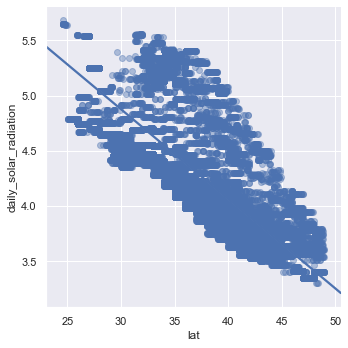

In [15]:

g = sns.lmplot(y='daily_solar_radiation', 
               x='lat',
               data=Deep_Solar_df, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})


plt.show()


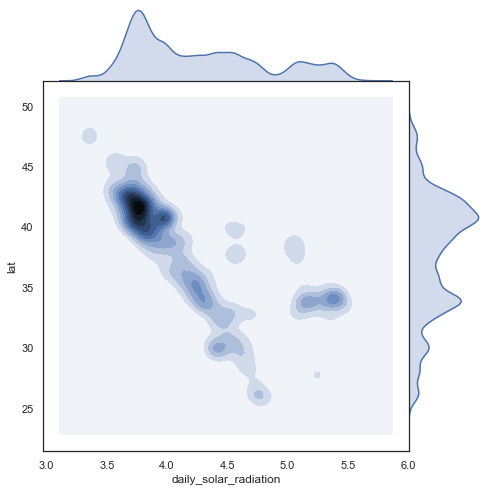

In [16]:



sns.set(style="white")

# Generate a random correlated bivariate dataset


#x1, x2 = rs.multivariate_normal(mean, cov, 500).T
x1 = Deep_Solar_df['daily_solar_radiation']
x2 = Deep_Solar_df['lat']

# Show the joint distribution using kernel density estimation
k = sns.jointplot(x1, x2, kind="kde", height=7, space=0)

plt.show()


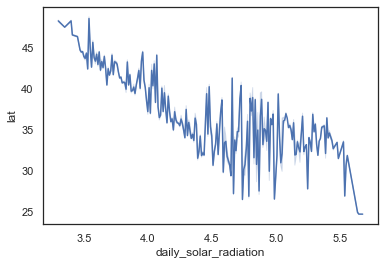

In [17]:

ax = sns.lineplot(x='daily_solar_radiation', y='lat', data=Deep_Solar_df)


In [12]:
 g = sns.jointplot(x='daily_solar_radiation', y='lat', data=Deep_Solar_df)

NameError: name 'Deep_Solar_df' is not defined

Choose one continuous variable and one categorical variable, and plot them six different ways.

In [13]:
power_plants = pd.read_csv('global_power_plant_database.csv')
power_plants.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017',
       'estimated_generation_gwh'],
      dtype='object')

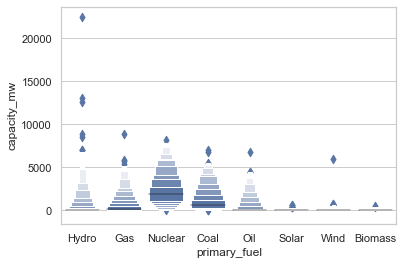

In [14]:

sns.set(style="whitegrid")

primary_fuel  = ["Hydro", "Gas","Nuclear", "Coal","Oil","Solar","Wind","Biomass"]

sns.boxenplot(x="primary_fuel", y="capacity_mw",
              color='b', order=primary_fuel,
              scale="linear", data=power_plants)

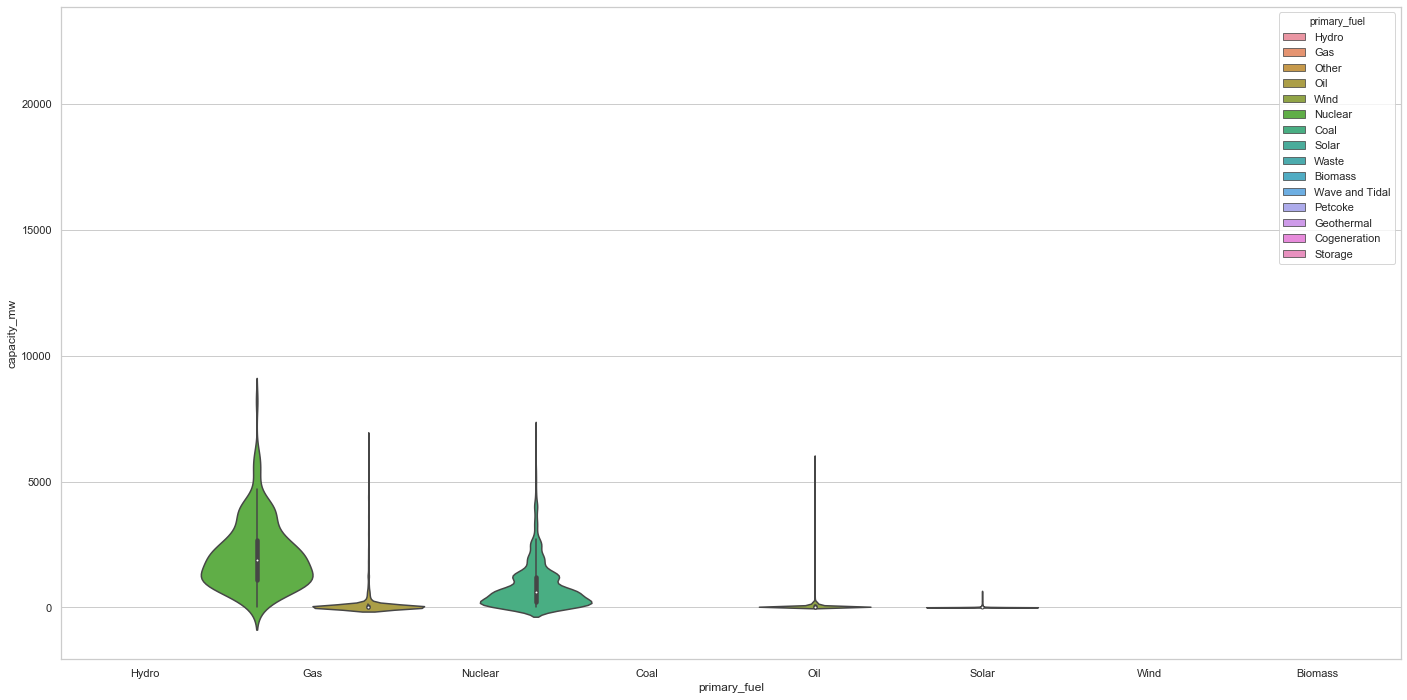

In [15]:
plt.figure(figsize=(24,12))
# Show each distribution with both violins and points
primary_fuel  = ["Hydro", "Gas","Nuclear", "Coal","Oil","Solar","Wind","Biomass"]

sns.violinplot(x='primary_fuel', y='capacity_mw',hue = 'primary_fuel', data=power_plants, order = primary_fuel, scale='width', width = 10)
               
               
               
               
               

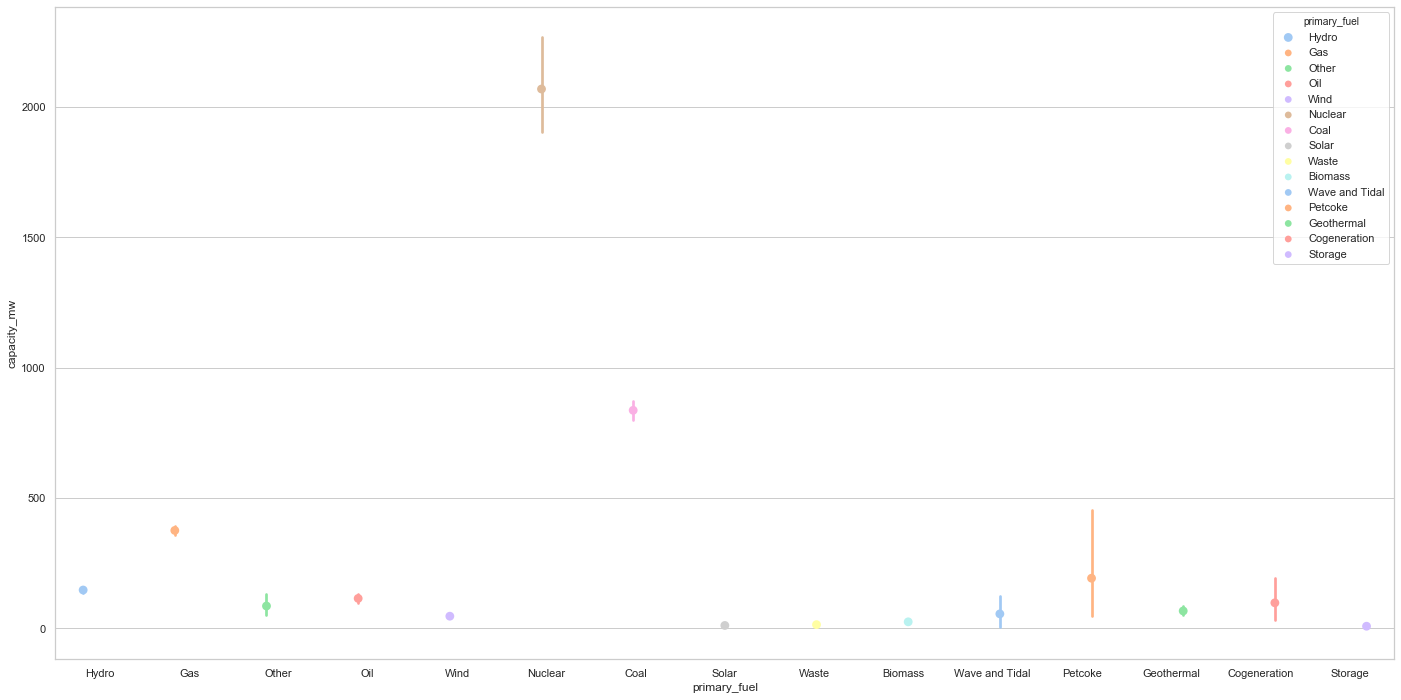

In [16]:
plt.figure(figsize=(24,12))
# Show each distribution with both violins and points
primary_fuel  = ["Hydro", "Gas","Nuclear", "Coal","Oil","Solar","Wind","Biomass"]
 
    
g = sns.pointplot(x="primary_fuel", y="capacity_mw", hue="primary_fuel", data=power_plants,
                   height=6, kind="strip", palette="pastel",ci=95,dodge=True,join=False)
    
    

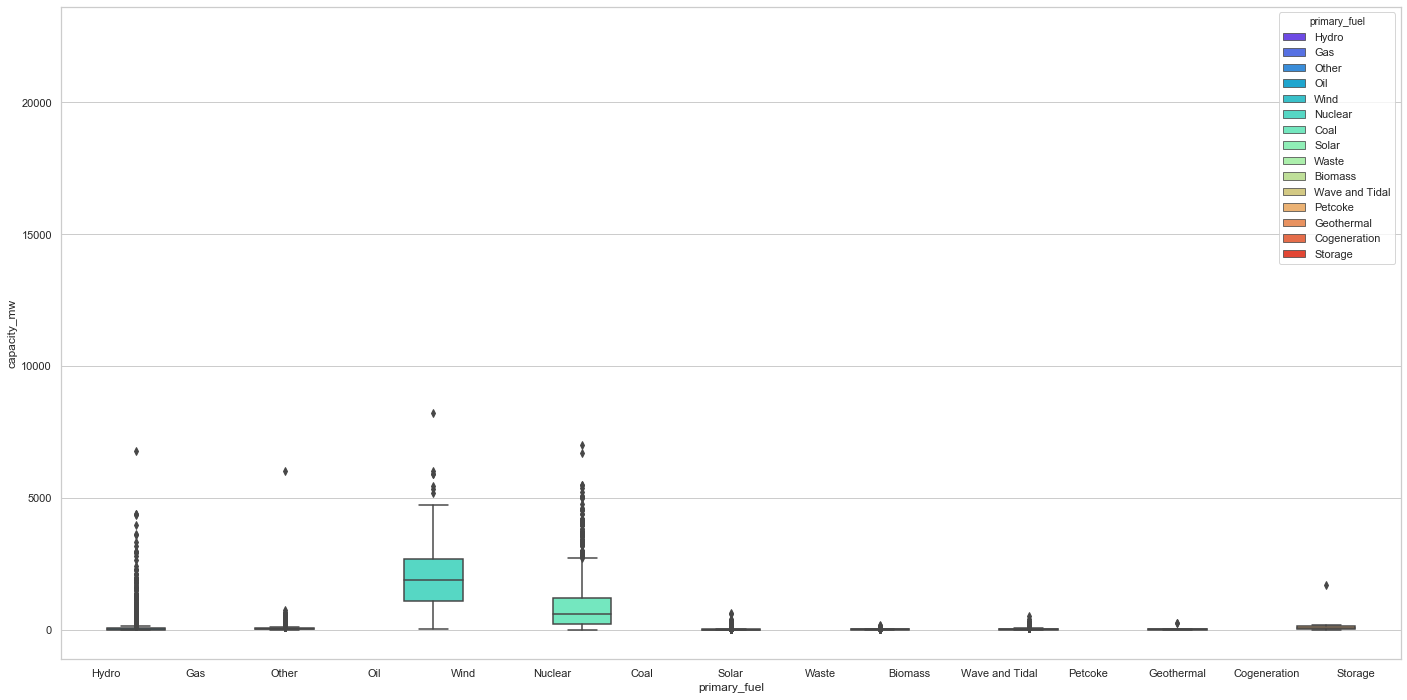

In [17]:
#sns.boxplot(x="distance", y="method", data=planets,
 #           whis="range", palette="vlag")


plt.figure(figsize=(24,12))

sns.boxplot(x="primary_fuel", y="capacity_mw", hue="primary_fuel", data=power_plants,
                     width = 10,palette="rainbow",dodge=True)
    

<Figure size 2592x1296 with 0 Axes>

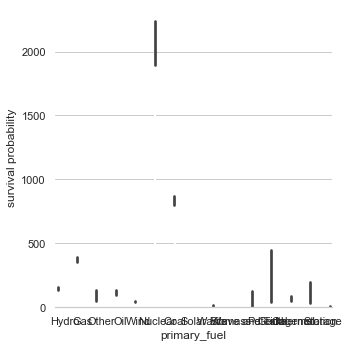

In [18]:
plt.figure(figsize=(36,18))

g=sns.catplot(x="primary_fuel", y="capacity_mw", hue="primary_fuel", data=power_plants,
                     kind = 'bar', palette="rainbow",dodge=True)
g.despine(left=True)
g.set_ylabels("survival probability")

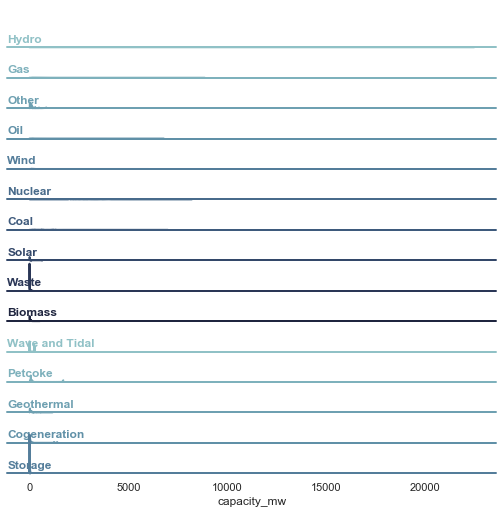

In [19]:

primary_fuel  = ["Hydro", "Gas","Nuclear", "Coal","Oil","Solar","Wind","Biomass"]

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(power_plants, row='primary_fuel', hue='primary_fuel', aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "capacity_mw", clip_on=False, shade=True, alpha=1, lw=2, bw=1)
#g.map(sns.kdeplot, "capacity_mw", clip_on=False, color="w", lw=8, bw=10)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "capacity_mw")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

I think the Boxen Plot and the violin plots where my favorite for graphing this data set they seem to show the most data and are fun to look at 

Find a dataset with at least four continuous variables and one categorical variable.

Create one master plot that gives insight into the variables and their interrelationships, including:
- Probability distributions
- Bivariate relationships
- Whether the distributions or the relationships vary across groups
- Accompany your plot with a written description of what you see.

Variables
continuous 
 daily_solar_radiation
 solar_system_count 
 total_panel_area
 avg_electricity_retail_rate
 
 Deep_Solar_df
 catagorical
 rebates
 1,7,10,12,14
 

plt.subplot()


deep solar

sns.lmplot(x="daily_solar_radiation", y="solar_system_count", hue="rebate",
               truncate=True, height=5, data=Deep_Solar_county)


ValueError: could not convert string to float: 'Radial Velocity'

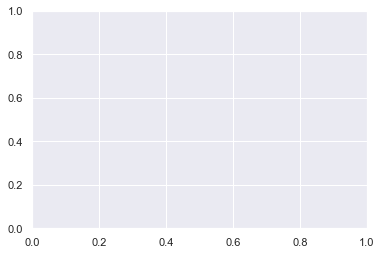

In [36]:

sns.set(style="darkgrid")
planets = sns.load_dataset("planets")


# Set up the figure
#f, ax = plt.subplots(figsize=(8, 8))
#ax.set_aspect("equal")

# Draw the four density plots
sns.kdeplot(planets, x = 'orbital_period',y = 'mass', hue = 'method')
#ax = sns.kdeplot(Imaging.orbital_period, Imaging.mass,
                 #cmap="Blues", shade=True, shade_lowest=False)
#ax = sns.kdeplot(Eclipse_Timing_Variations.orbital_period, Eclipse_Timing_Variations.mass,
#                 cmap="Blues", shade=True, shade_lowest=False)
#ax = sns.kdeplot(Transit.orbital_period, Transit.mass,
#                 cmap="Blues", shade=True, shade_lowest=False)


plt.ylim(0.0,3)
plt.xlim(0.0,526)

# Add labels to the plot
#red = sns.color_palette("Reds")[-2]
#blue = sns.color_palette("Blues")[-2]
#ax.text(2.5, 8.2, "virginica", size=16, color=blue)
#ax.text(3.8, 4.5, "setosa", size=16, color=red)
Imaging.head()


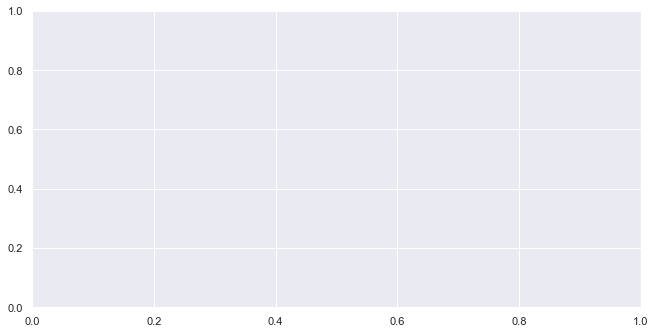

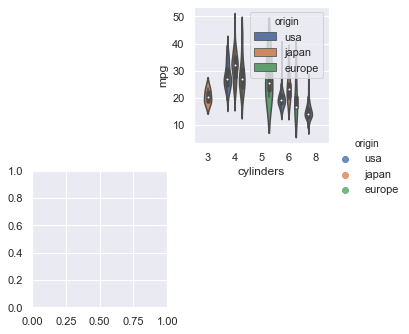

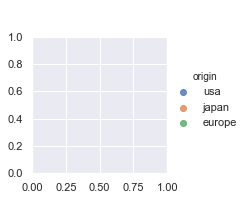

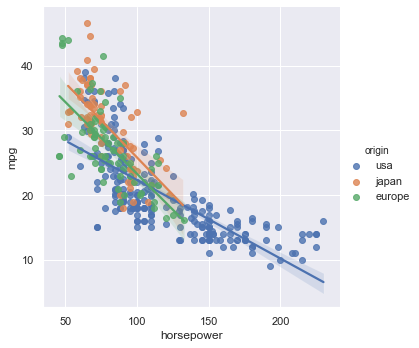

In [33]:
#sns.set()
plt.figure(figsize=(24,12))

# Load the iris dataset

plt.subplot(2,2,1)
#sns.set()
mpg = sns.load_dataset("mpg")

# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="weight", y="mpg", hue="origin",
               truncate=True, height=5, data=mpg)
# Use more informative axis labels than are provided by default
#g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")
plt.title('Pointplot: weight and miles per gallon')

plt.subplot(2,2,2)
sns.set(style='darkgrid')

# Plot sepal with as a function of sepal_length across days
g = sns.violinplot(x="cylinders", y="mpg", hue="origin",
               truncate=True, height=5, data=mpg)

plt.subplot(2,2,3)
#sns.set()

# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="model_year", y="mpg", hue="origin",
               truncate=True, height=5, data=mpg)

plt.subplot(2,2,4)
sns.set(style='darkgrid')

# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="horsepower", y="mpg", hue="origin",
               truncate=True, height=5, data=mpg)
plt.show()
#mpg.columns

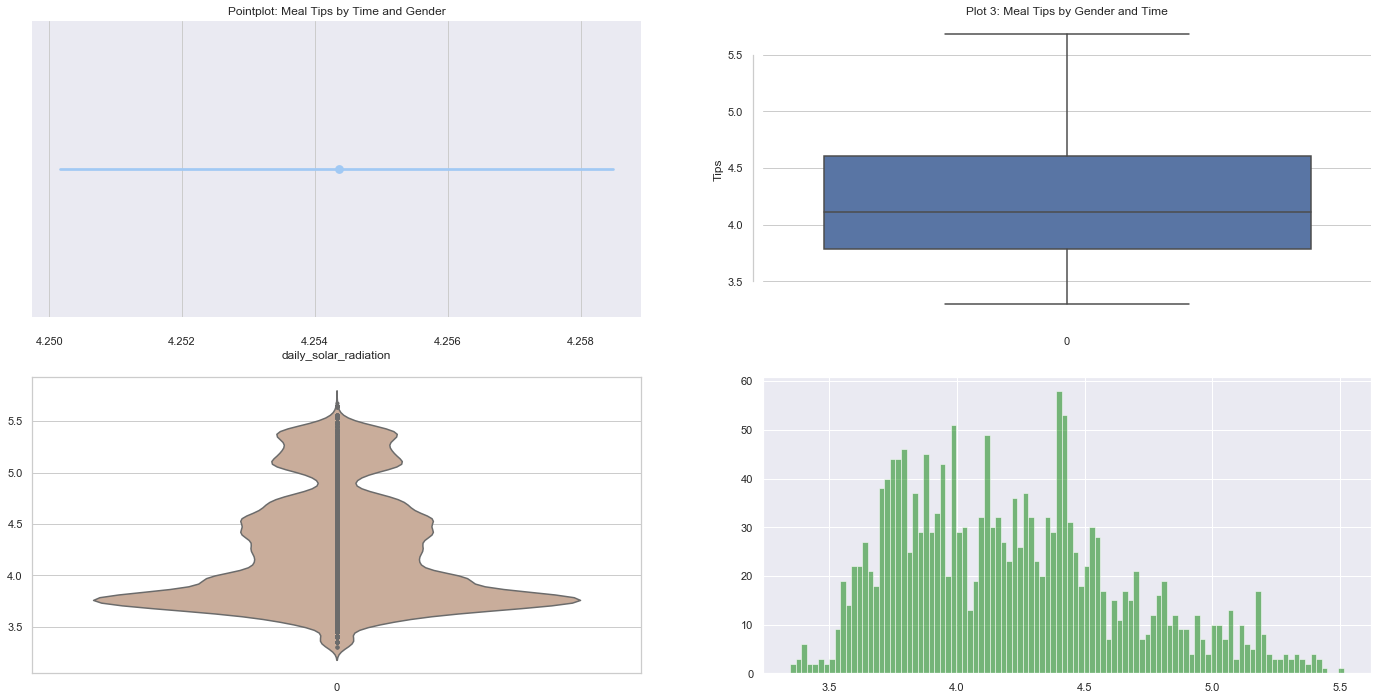

In [30]:
#Create 4 subplots 
plt.figure(figsize=(24,12))
#subplot 1
plt.subplot(2, 2, 1)

# Setting the overall aesthetic.
sns.set(style="whitegrid")
sns.pointplot(x="daily_solar_radiation", y=None, hue=None, data=Deep_Solar_df,
                   height=6, kind="strip", palette="pastel",ci=95,dodge=True,join=False)
plt.title('Pointplot: Meal Tips by Time and Gender')


#subplot 2
plt.subplot(2, 2, 2)

# Comparing groups using boxplots.
ax = sns.boxplot(x=None,y=None,hue=None,data=Deep_Solar_df['daily_solar_radiation'])  
plt.title('Plot 3: Meal Tips by Gender and Time')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Tips')




#subplot 3
plt.subplot(2, 2, 3)

sns.set(style='darkgrid')
sns.violinplot(data=Deep_Solar_df['daily_solar_radiation'], palette='pink', inner="points")


#subplot 4
plt.subplot(2, 2, 4)
plt.hist(Deep_Solar_county['daily_solar_radiation'],bins=100, color='green', alpha=0.5 )

plt.show()